In [12]:
# 对 同花顺 的时序股票数据进行回归分析

import pandas as pd

stock = 300033

df = pd.read_csv(str(stock) + '.csv')

df.head()

,Unnamed: 0,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,0,2015-04-30,300033,97.20,108.68,108.68,94.08,209641,2.190859e+09,14.78,10.00,9.88,8.00
1,1,2015-05-04,300033,110.00,101.30,110.00,98.00,242099,2.496548e+09,11.04,-6.79,-7.38,9.24
2,2,2015-05-05,300033,98.15,95.20,100.00,93.44,183770,1.768032e+09,6.48,-6.02,-6.10,7.01
3,3,2015-05-06,300033,98.19,100.20,104.72,97.00,278245,2.821257e+09,8.11,5.25,5.00,10.62
4,4,2015-05-07,300033,96.00,96.16,102.00,93.00,190484,1.861585e+09,8.98,-4.03,-4.04,7.27


In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('股票代码', axis=1, inplace=True)
df.set_index('日期', inplace=True)
df.head()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,
2015-04-30,97.20,108.68,108.68,94.08,209641,2.190859e+09,14.78,10.00,9.88,8.00
2015-05-04,110.00,101.30,110.00,98.00,242099,2.496548e+09,11.04,-6.79,-7.38,9.24
2015-05-05,98.15,95.20,100.00,93.44,183770,1.768032e+09,6.48,-6.02,-6.10,7.01
2015-05-06,98.19,100.20,104.72,97.00,278245,2.821257e+09,8.11,5.25,5.00,10.62
2015-05-07,96.00,96.16,102.00,93.00,190484,1.861585e+09,8.98,-4.03,-4.04,7.27


In [14]:
# 没有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2431 entries, 2015-04-30 to 2025-04-30
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   开盘      2431 non-null   float64
 1   收盘      2431 non-null   float64
 2   最高      2431 non-null   float64
 3   最低      2431 non-null   float64
 4   成交量     2431 non-null   int64  
 5   成交额     2431 non-null   float64
 6   振幅      2431 non-null   float64
 7   涨跌幅     2431 non-null   float64
 8   涨跌额     2431 non-null   float64
 9   换手率     2431 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 208.9+ KB


In [15]:
# 基本统计信息
df.describe()

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
count,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2.431000e+03,2431.000000,2431.000000,2431.000000,2431.000000
mean,106.570107,106.854241,109.521078,104.391518,92587.180995,1.122285e+09,4.578741,0.106697,0.065734,3.459634
std,56.963443,57.190378,59.033864,55.528537,71680.642611,1.398196e+09,3.124838,3.693447,4.960867,2.688967
min,29.020000,28.800000,29.770000,28.480000,9020.000000,3.032947e+07,0.000000,-17.440000,-45.460000,0.340000
25%,67.915000,68.040000,69.035000,67.095000,42814.000000,3.549253e+08,2.480000,-1.610000,-1.555000,1.590000
50%,97.060000,97.220000,99.000000,95.310000,69433.000000,7.103328e+08,3.560000,-0.170000,-0.140000,2.580000
75%,126.050000,126.140000,129.485000,123.365000,120831.000000,1.338568e+09,5.645000,1.455000,1.390000,4.515000
max,360.000000,344.480000,364.990000,334.230000,691945.000000,1.430401e+10,32.500000,20.000000,54.600000,26.410000


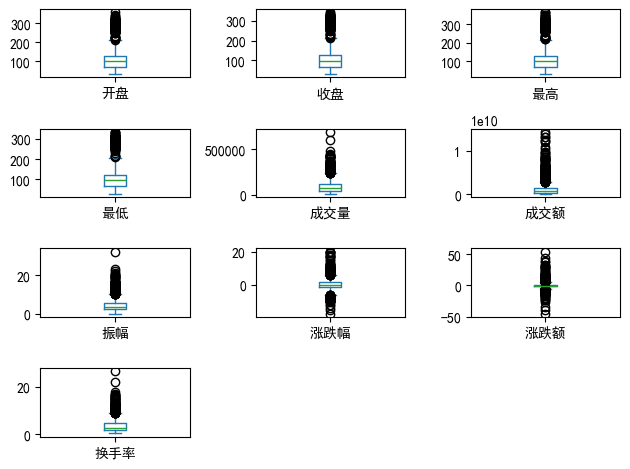

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 绘制所有数值型列的箱线图
df.plot(kind='box', subplots=True, layout=(4,3))
plt.tight_layout()
plt.show()

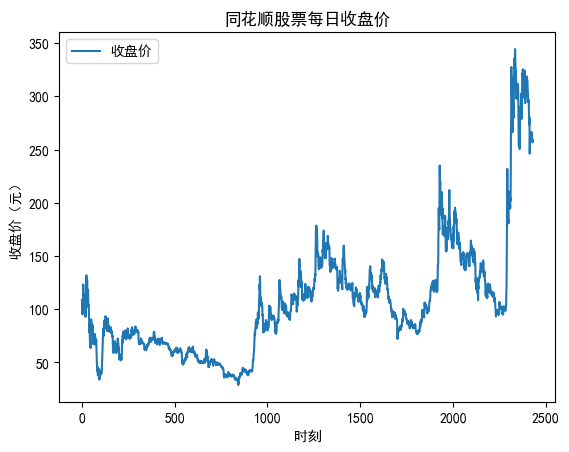

In [17]:
import numpy as np

plt.plot(np.arange(df.shape[0]), df['收盘'], label='收盘价')
plt.legend()
plt.title('同花顺股票每日收盘价')
plt.xlabel('时刻')
plt.ylabel('收盘价（元）')
plt.show()

方案一：
（1）以收盘价作为因变量，使用时间作为自变量，建立回归模型。
（2）将数据集的前80%作为多项式回归的训练集，将后20%作为测试集。
（3）使用MSE和R2参数作为评价指标。
（4）使用一个循环搜索多项式的最高次。多项式的最高次是个重要的参数，太小模型过于简单，效果不好；过大会产生过拟合或者预测值跳变的现象。

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = np.arange(df.shape[0]).reshape(-1, 1)


y = df['收盘'].values

# 分割数据为训练集和测试集，这里保留20%的数据作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 创建多项式特征

for degree in range(1, 8):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # 拟合线性回归模型
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # 预测
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # 计算并输出误差指标
    print(degree)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"训练集均方误差 (MSE): {train_mse}")
    print(f"测试集均方误差 (MSE): {test_mse}")
    print(f"训练集R^2得分: {train_r2}")
    print(f"测试集R^2得分: {test_r2}")


1
训练集均方误差 (MSE): 750.1115255209922
测试集均方误差 (MSE): 7024.26954786016
训练集R^2得分: 0.3476243247763673
测试集R^2得分: -0.3740458057312608
2
训练集均方误差 (MSE): 727.2413152721589
测试集均方误差 (MSE): 5132.236035448482
训练集R^2得分: 0.3675146588746555
测试集R^2得分: -0.003937470007694399
3
训练集均方误差 (MSE): 535.8710207239543
测试集均方误差 (MSE): 32030.717210927414
训练集R^2得分: 0.533950343270944
测试集R^2得分: -5.265658277827113
4
训练集均方误差 (MSE): 533.9264604269423
测试集均方误差 (MSE): 22780.787220054935
训练集R^2得分: 0.5356415369049776
测试集R^2得分: -3.456242021707216
5
训练集均方误差 (MSE): 330.14655379152106
测试集均方误差 (MSE): 327096.3601689417
训练集R^2得分: 0.7128699218387474
测试集R^2得分: -62.98464334231209
6
训练集均方误差 (MSE): 222.37692542044613
测试集均方误差 (MSE): 2588462.808915002
训练集R^2得分: 0.806597696556445
测试集R^2得分: -505.3396900770275
7
训练集均方误差 (MSE): 220.07749595956986
测试集均方误差 (MSE): 4447248.952246223
训练集R^2得分: 0.8085975216439563
测试集R^2得分: -868.9443733246551


2
训练集均方误差 (MSE): 727.2413152721589
测试集均方误差 (MSE): 5132.236035448482
训练集R^2得分: 0.3675146588746555
测试集R^2得分: -0.003937470007694399


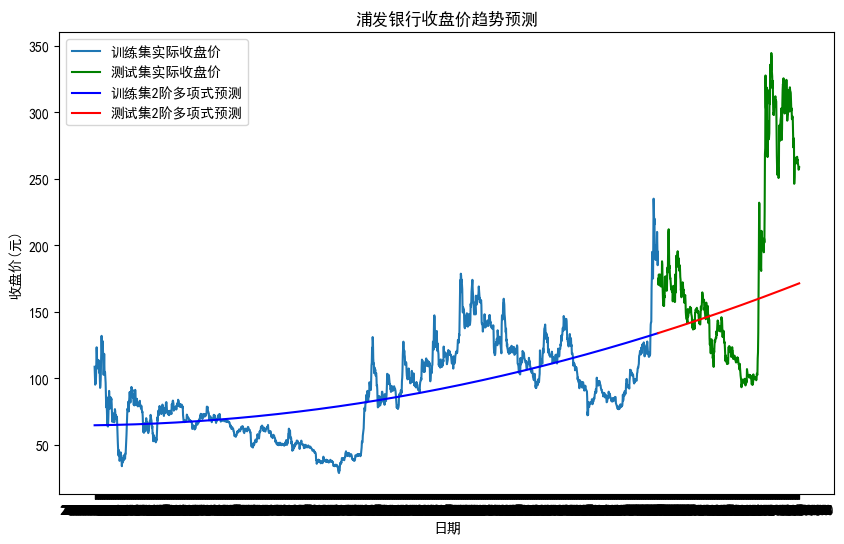

Model Coefficients: [2.63802136e-03 1.69777095e-05]
Intercept: 64.69627733120964


In [19]:
degree = 2

poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 拟合线性回归模型
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 预测
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# 计算并输出误差指标
print(degree)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"训练集均方误差 (MSE): {train_mse}")
print(f"测试集均方误差 (MSE): {test_mse}")
print(f"训练集R^2得分: {train_r2}")
print(f"测试集R^2得分: {test_r2}")

plt.figure(figsize=(10, 6))
plt.plot(df.index[X_train.flatten()], y_train, label='训练集实际收盘价')
plt.plot(df.index[X_test.flatten()], y_test, label='测试集实际收盘价', color='green')
plt.plot(df.index[X_train.flatten()], y_train_pred, label=f'训练集{degree}阶多项式预测', color='blue')
plt.plot(df.index[X_test.flatten()], y_test_pred, label=f'测试集{degree}阶多项式预测', color='red')
plt.title('浦发银行收盘价趋势预测')
plt.xlabel('日期')
plt.ylabel('收盘价(元)')
plt.legend()
plt.show()

# 输出模型系数
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

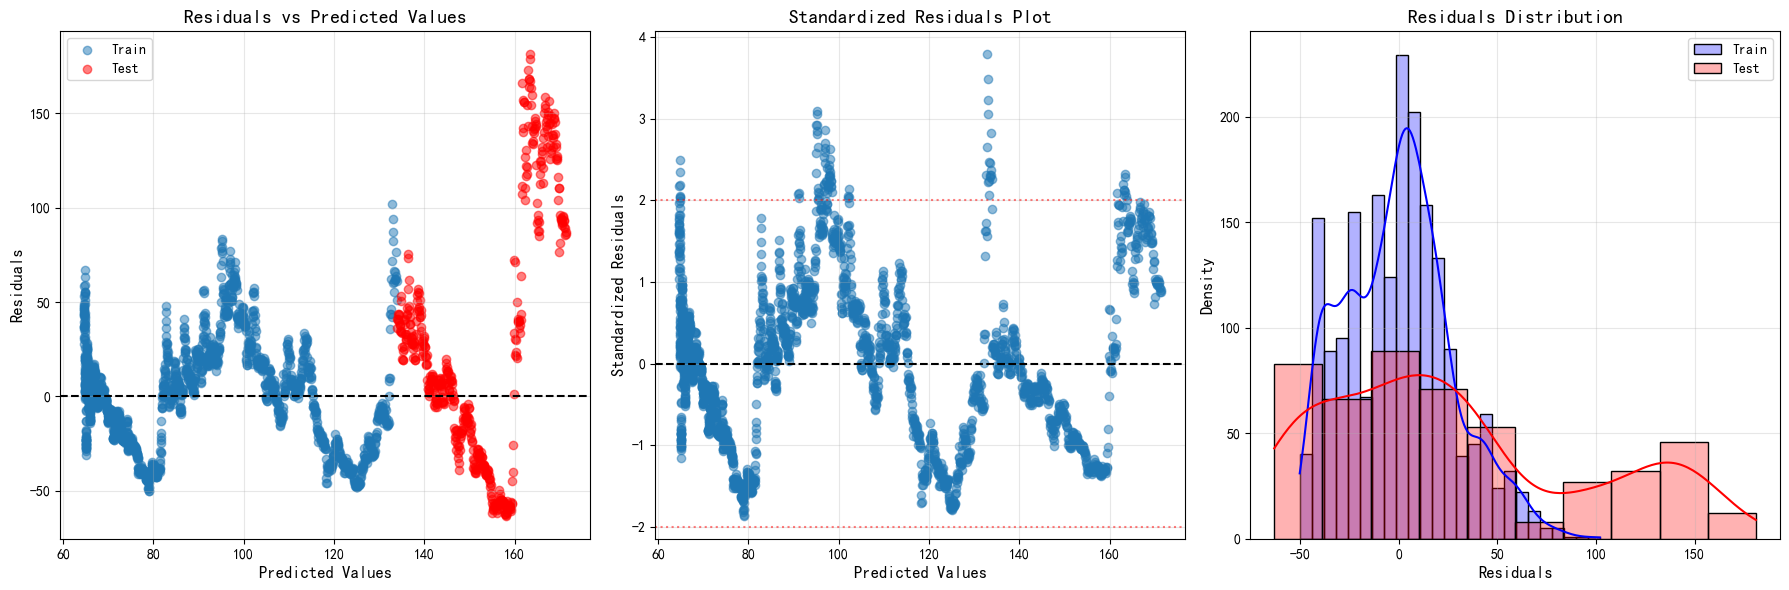

In [20]:
import seaborn as sns

# 计算训练集和测试集残差
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred
 
# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_train_pred, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_test_pred, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_train_pred, y_test_pred]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

自回归的意思是，对于一个时间序列，使用一个时刻的前几个时刻的数据，预测这一个时刻的数据。

训练集大小: 1942
测试集大小: 486
Train RMSE: 17.13177649028624
Test RMSE: 27.04550456961892


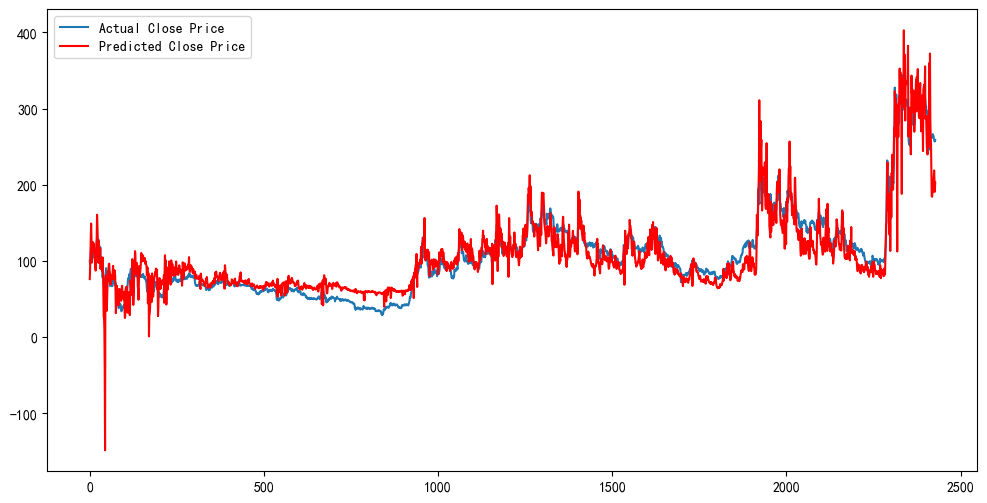

In [21]:
# 选择需要的特征
features = ['开盘','最高','最低','成交量','成交额','振幅', '换手率']
target = '收盘'

# 确保没有缺失值
df_selected = df[features + [target]].dropna()

# 构造滞后特征
lag_features = {}
lags = 3  # 滞后期数
for feature in features + [target]:
    for lag in range(1, lags + 1):
        col_name = f'{feature}_lag_{lag}'
        df_selected[col_name] = df_selected[feature].shift(lag)
        
# 删除含有NaN的行（由滞后导致）
df_selected.dropna(inplace=True)

# 划分特征和目标变量
X = df_selected[[col for col in df_selected.columns if col != target]]
y = df_selected[target]

# 使用train_test_split进行随机划分，保留时间索引用于后续绘图
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"训练集大小: {len(X_train)}")
print(f"测试集大小: {len(X_test)}")

# 创建多项式特征
degree = 2  # 设定多项式的阶数
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 预测
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# 评估模型
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# 为了可视化，我们需要将预测结果与原始索引对齐
# 将预测结果放到DataFrame中，并用原始索引排序
predictions_df = pd.DataFrame({
    'Actual': np.concatenate([y_train.values, y_test.values]),
    'Predicted': np.concatenate([y_pred_train, y_pred_test])
}, index=np.concatenate([y_train.index.values, y_test.index.values]))

predictions_df.sort_index(inplace=True)

# 可视化收盘价预测结果与实际值
plt.figure(figsize=(12, 6))
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Actual'], label='Actual Close Price')
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Predicted'], label='Predicted Close Price', color='red')
plt.legend()
plt.show()

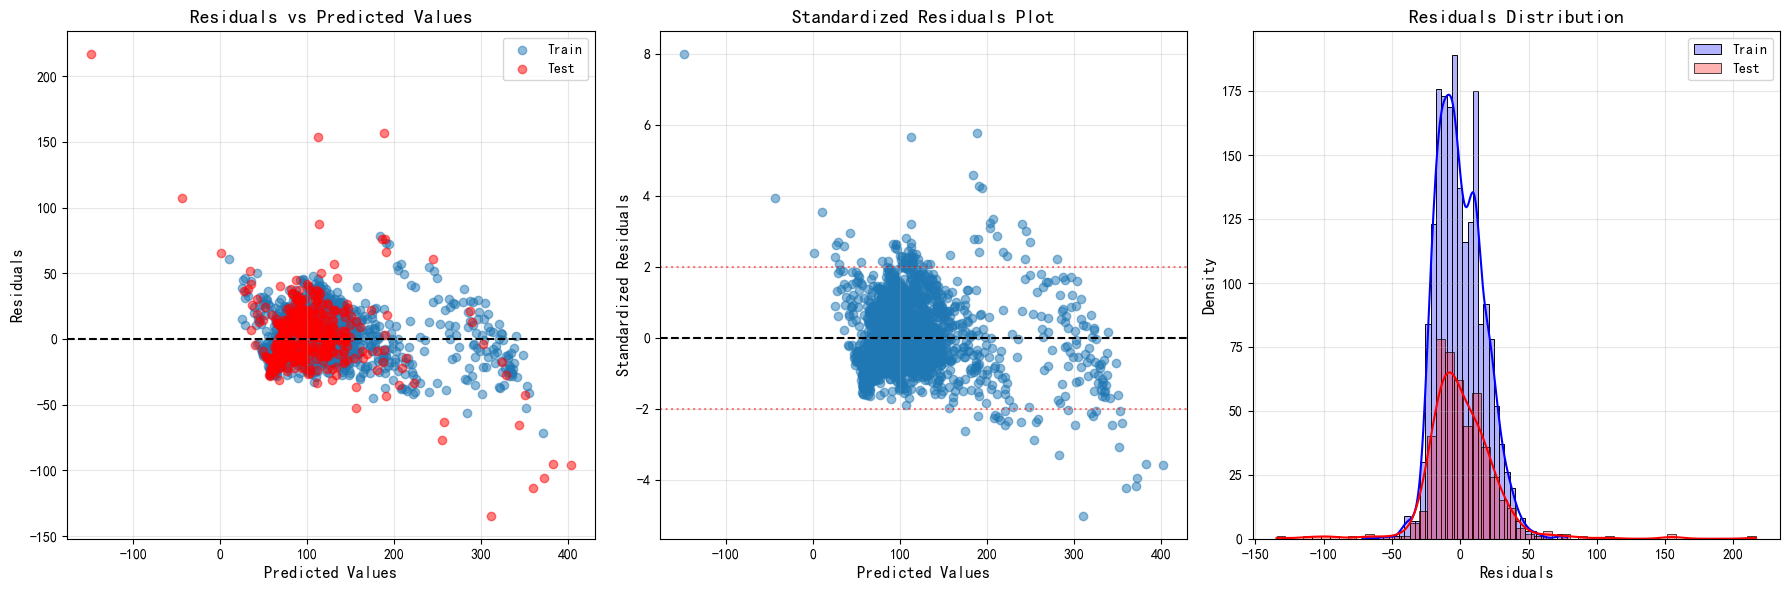

In [22]:
# 计算训练集和测试集残差
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred_test, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred_test]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

训练集大小: 1940
测试集大小: 486
最佳参数组合： {'max_depth': None, 'n_estimators': 150}
最佳模型的交叉验证R²分数： -10.71169186449254
测试集的均方误差： 4.757800603539139


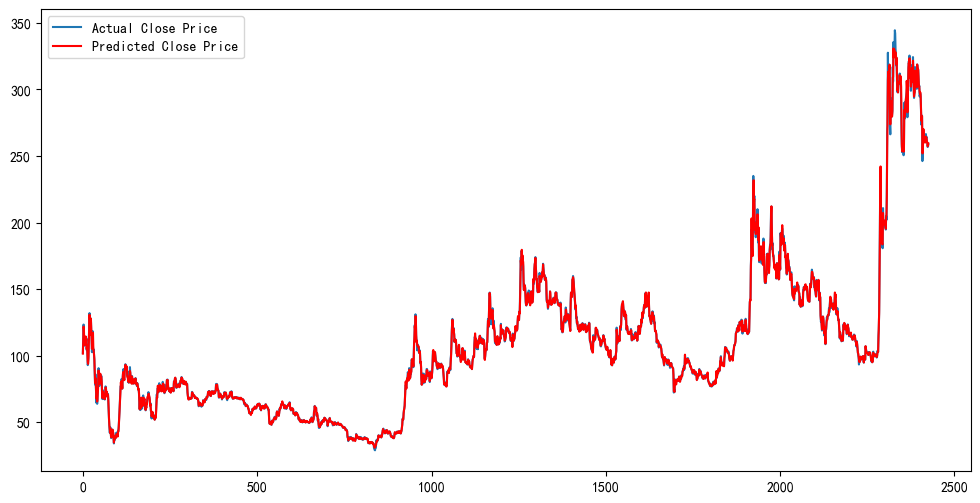

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# 选择需要的特征
features = ['开盘','最高','最低','成交量','成交额','振幅', '换手率']
target = '收盘'

# 确保没有缺失值
df_selected = df[features + [target]].dropna()

# 构造滞后特征
lag_features = {}
lags = 5  # 滞后期数
for feature in features + [target]:
    for lag in range(1, lags + 1):
        col_name = f'{feature}_lag_{lag}'
        df_selected[col_name] = df_selected[feature].shift(lag)
        
# 删除含有NaN的行（由滞后导致）
df_selected.dropna(inplace=True)

# 划分特征和目标变量
X = df_selected[[col for col in df_selected.columns if col != target]]
y = df_selected[target]

# 使用train_test_split进行随机划分，保留时间索引用于后续绘图
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"训练集大小: {len(X_train)}")
print(f"测试集大小: {len(X_test)}")


rf = RandomForestRegressor(random_state=137)
param_grid = {
    'n_estimators': [100, 150, 200],  # 决策树的数量
    'max_depth': [None, 5, 10],  # 树的最大深度
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳模型的交叉验证R²分数：", grid_search.best_score_)


# 使用最佳模型对测试集进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算并输出测试集的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差：", mse)


# 下面进行可视化

y_pred_train = best_model.predict(X_train)
y_pred_test = y_pred

# 为了可视化，我们需要将预测结果与原始索引对齐
predictions_df = pd.DataFrame({
    'Actual': np.concatenate([y_train.values, y_test.values]),
    'Predicted': np.concatenate([y_pred_train, y_pred_test])
}, index=np.concatenate([y_train.index.values, y_test.index.values]))

predictions_df.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Actual'], label='Actual Close Price')
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Predicted'], label='Predicted Close Price', color='red')
plt.legend()
plt.show()

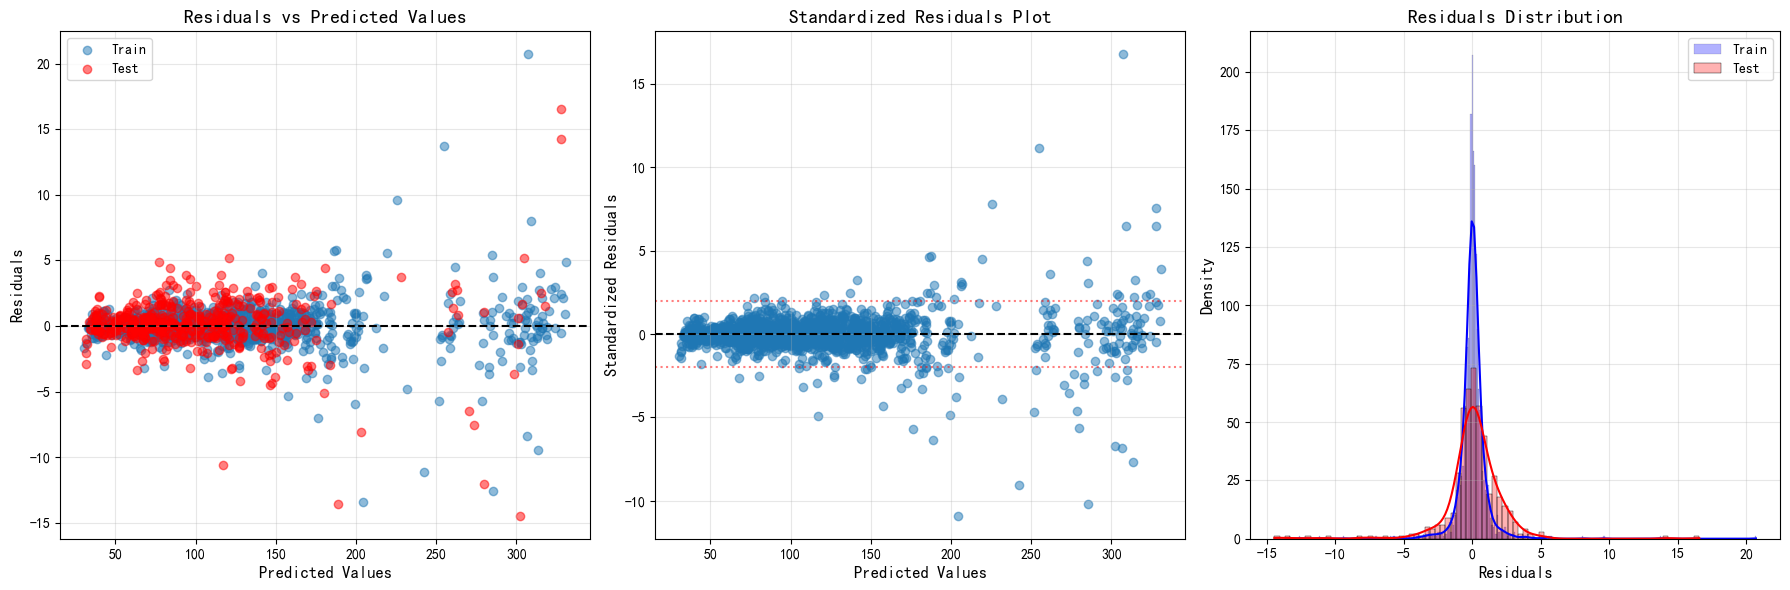

In [24]:
# 计算训练集和测试集残差
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred_test, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred_test]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

训练集大小: 1940
测试集大小: 486
最佳参数组合： {'C': 100}
最佳模型的交叉验证R²分数： -1007.2891232350603
测试集的均方误差： 1023.2263818677548


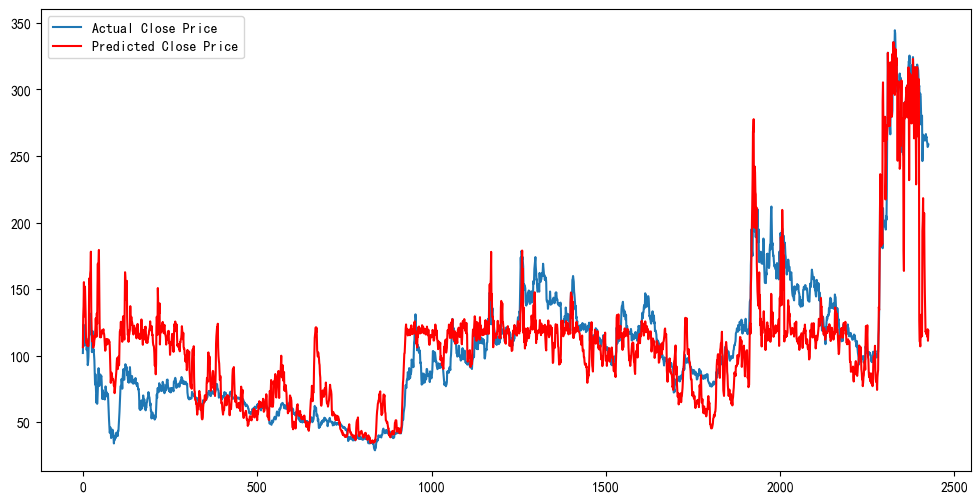

In [25]:
from sklearn.svm import SVR

# 选择需要的特征
features = ['开盘','最高','最低','成交量','成交额','振幅', '换手率']
target = '收盘'

# 确保没有缺失值
df_selected = df[features + [target]].dropna()

# 构造滞后特征
lag_features = {}
lags = 5  # 滞后期数
for feature in features + [target]:
    for lag in range(1, lags + 1):
        col_name = f'{feature}_lag_{lag}'
        df_selected[col_name] = df_selected[feature].shift(lag)
        
# 删除含有NaN的行（由滞后导致）
df_selected.dropna(inplace=True)

# 划分特征和目标变量
X = df_selected[[col for col in df_selected.columns if col != target]]
y = df_selected[target]

# 使用train_test_split进行随机划分，保留时间索引用于后续绘图
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"训练集大小: {len(X_train)}")
print(f"测试集大小: {len(X_test)}")


rf = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],  # 正则化参数
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳模型的交叉验证R²分数：", grid_search.best_score_)


# 使用最佳模型对测试集进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算并输出测试集的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差：", mse)


# 下面进行可视化

y_pred_train = best_model.predict(X_train)
y_pred_test = y_pred

# 为了可视化，我们需要将预测结果与原始索引对齐
predictions_df = pd.DataFrame({
    'Actual': np.concatenate([y_train.values, y_test.values]),
    'Predicted': np.concatenate([y_pred_train, y_pred_test])
}, index=np.concatenate([y_train.index.values, y_test.index.values]))

predictions_df.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Actual'], label='Actual Close Price')
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Predicted'], label='Predicted Close Price', color='red')
plt.legend()
plt.show()

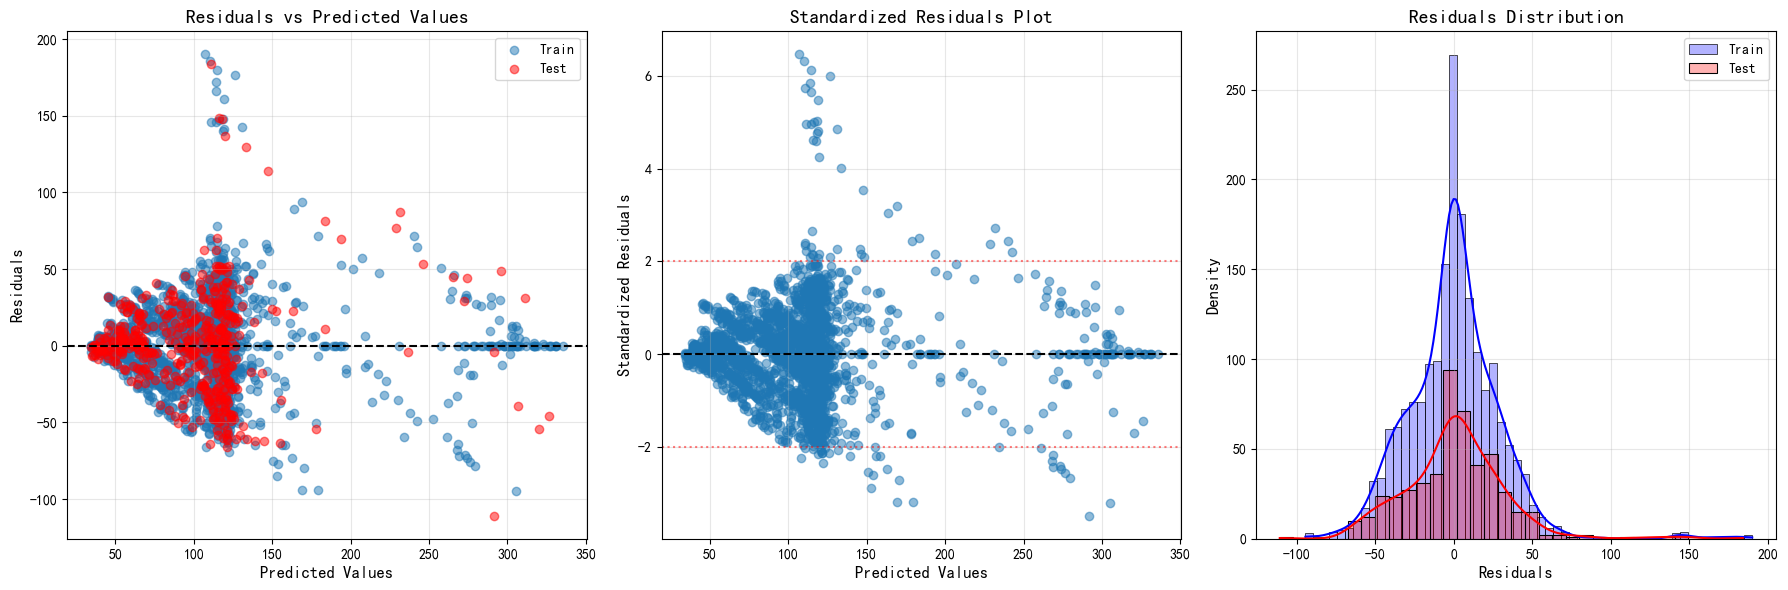

In [26]:
# 计算训练集和测试集残差
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred_test, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred_test]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

训练集大小: 1940
测试集大小: 486
最佳参数组合： {'hidden_layer_sizes': (50, 100, 50), 'learning_rate_init': 0.01}
最佳模型的交叉验证R²分数： -1011003542607.9563
测试集的均方误差： 1196535683218.0005


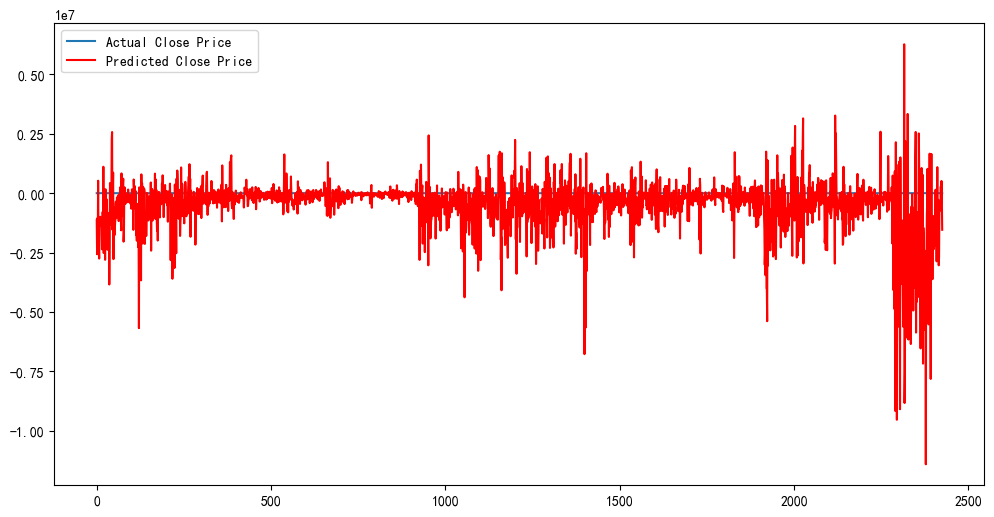

In [27]:
from sklearn.neural_network import MLPRegressor

# 选择需要的特征
features = ['开盘','最高','最低','成交量','成交额','振幅', '换手率']
target = '收盘'

# 确保没有缺失值
df_selected = df[features + [target]].dropna()

# 构造滞后特征
lag_features = {}
lags = 5  # 滞后期数
for feature in features + [target]:
    for lag in range(1, lags + 1):
        col_name = f'{feature}_lag_{lag}'
        df_selected[col_name] = df_selected[feature].shift(lag)
        
# 删除含有NaN的行（由滞后导致）
df_selected.dropna(inplace=True)

# 划分特征和目标变量
X = df_selected[[col for col in df_selected.columns if col != target]]
y = df_selected[target]

# 使用train_test_split进行随机划分，保留时间索引用于后续绘图
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"训练集大小: {len(X_train)}")
print(f"测试集大小: {len(X_test)}")


rf = MLPRegressor(max_iter=2500)
param_grid = {
    'hidden_layer_sizes': [(50,100, 50), (50, 50)],  # 隐藏层的神经元数量和结构
    'learning_rate_init': [0.001, 0.01]  # 初始学习率
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳模型的交叉验证R²分数：", grid_search.best_score_)


# 使用最佳模型对测试集进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算并输出测试集的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差：", mse)


# 下面进行可视化

y_pred_train = best_model.predict(X_train)
y_pred_test = y_pred

# 为了可视化，我们需要将预测结果与原始索引对齐
predictions_df = pd.DataFrame({
    'Actual': np.concatenate([y_train.values, y_test.values]),
    'Predicted': np.concatenate([y_pred_train, y_pred_test])
}, index=np.concatenate([y_train.index.values, y_test.index.values]))

predictions_df.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Actual'], label='Actual Close Price')
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Predicted'], label='Predicted Close Price', color='red')
plt.legend()
plt.show()

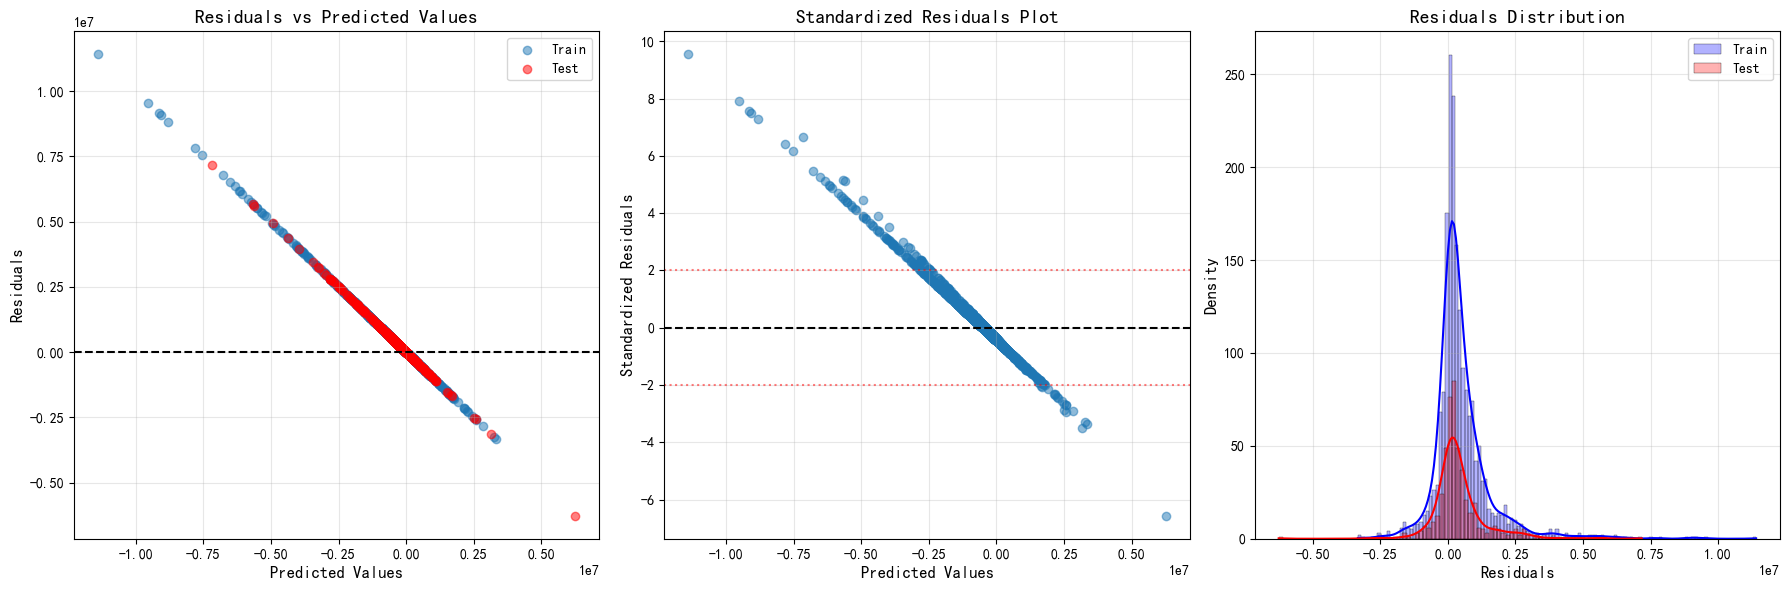

In [28]:
# 计算训练集和测试集残差
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred_test, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred_test]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

训练集大小: 1940
测试集大小: 486
最佳参数组合： {'n_neighbors': 22}
最佳模型的交叉验证R²分数： -1034.5248323025476
测试集的均方误差： 1020.143921147927


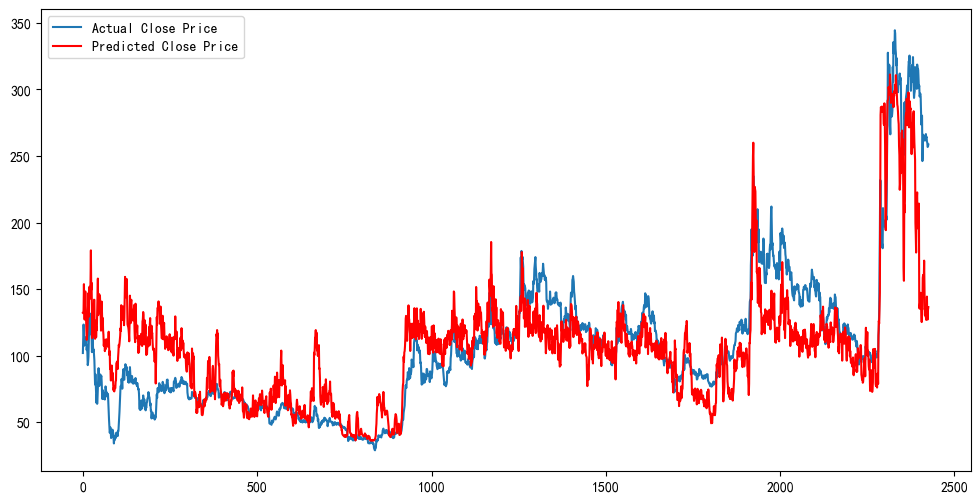

In [29]:
from sklearn.neighbors import KNeighborsRegressor


# 选择需要的特征
features = ['开盘','最高','最低','成交量','成交额','振幅', '换手率']
target = '收盘'

# 确保没有缺失值
df_selected = df[features + [target]].dropna()

# 构造滞后特征
lag_features = {}
lags = 5  # 滞后期数
for feature in features + [target]:
    for lag in range(1, lags + 1):
        col_name = f'{feature}_lag_{lag}'
        df_selected[col_name] = df_selected[feature].shift(lag)
        
# 删除含有NaN的行（由滞后导致）
df_selected.dropna(inplace=True)

# 划分特征和目标变量
X = df_selected[[col for col in df_selected.columns if col != target]]
y = df_selected[target]

# 使用train_test_split进行随机划分，保留时间索引用于后续绘图
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(f"训练集大小: {len(X_train)}")
print(f"测试集大小: {len(X_test)}")


rf = KNeighborsRegressor()
param_grid = {
    'n_neighbors': range(3, 50)
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳模型的交叉验证R²分数：", grid_search.best_score_)


# 使用最佳模型对测试集进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算并输出测试集的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集的均方误差：", mse)


# 下面进行可视化

y_pred_train = best_model.predict(X_train)
y_pred_test = y_pred

# 为了可视化，我们需要将预测结果与原始索引对齐
predictions_df = pd.DataFrame({
    'Actual': np.concatenate([y_train.values, y_test.values]),
    'Predicted': np.concatenate([y_pred_train, y_pred_test])
}, index=np.concatenate([y_train.index.values, y_test.index.values]))

predictions_df.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Actual'], label='Actual Close Price')
plt.plot(np.arange(predictions_df.shape[0]), predictions_df['Predicted'], label='Predicted Close Price', color='red')
plt.legend()
plt.show()


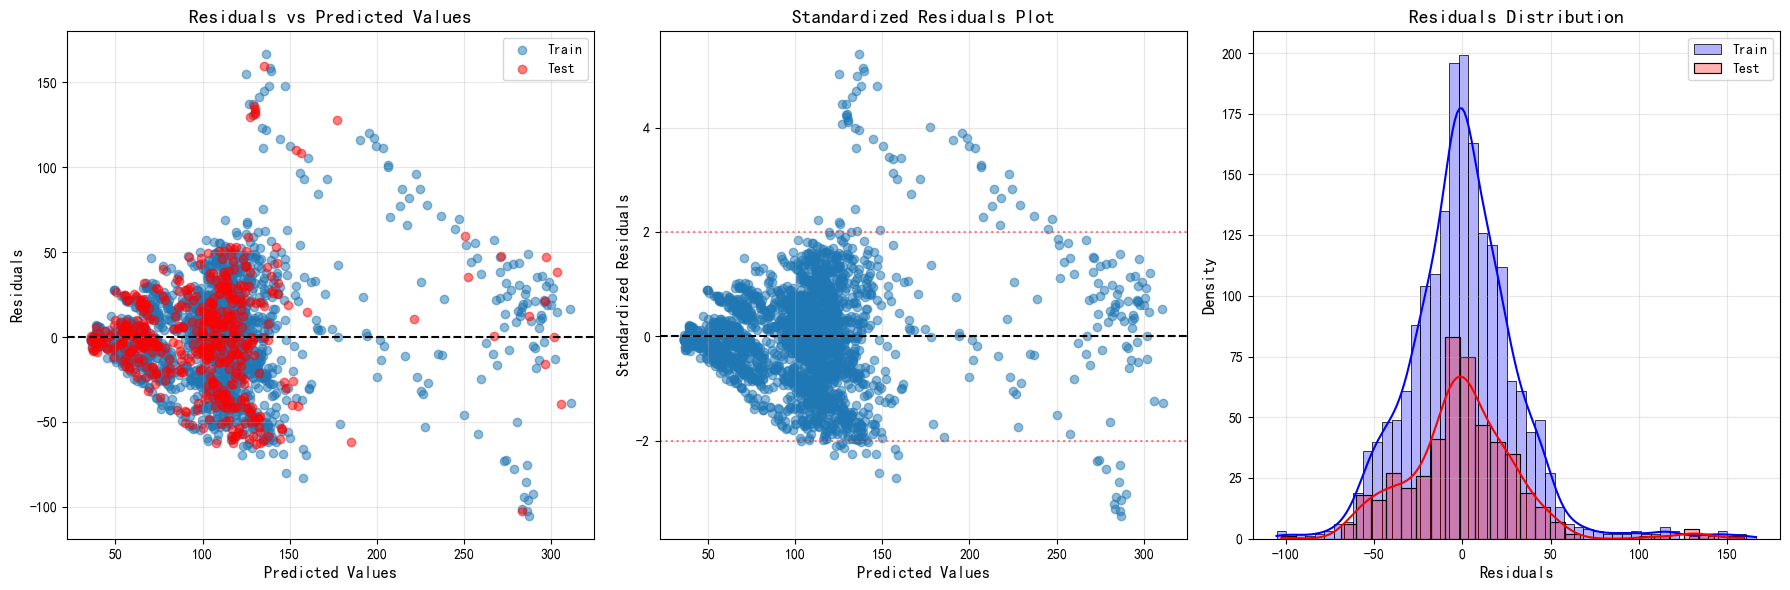

In [30]:
# 计算训练集和测试集残差
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# 创建子图布局
plt.figure(figsize=(18, 6))

# 子图1：预测值-残差散点图
plt.subplot(1, 3, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred_test, residuals_test, alpha=0.5, color='red', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# 子图2：标准化残差图
plt.subplot(1, 3, 2)
std_residuals = np.concatenate([(residuals_train - np.mean(residuals_train))/np.std(residuals_train),
                               (residuals_test - np.mean(residuals_test))/np.std(residuals_test)])
plt.scatter(np.concatenate([y_pred_train, y_pred_test]), std_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=2, color='red', linestyle=':', alpha=0.5)
plt.axhline(y=-2, color='red', linestyle=':', alpha=0.5)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Standardized Residuals', fontsize=12)
plt.title('Standardized Residuals Plot', fontsize=14)
plt.grid(alpha=0.3)

# 子图3：残差分布直方图
plt.subplot(1, 3, 3)
sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.3)
sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.3)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Residuals Distribution', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()